In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
airbnb = pd.read_csv("train.csv")
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
#drop thumbnail_url, neighbourhood, first_review, 
airbnb['review_scores_rating'].value_counts()

100.0    16215
98.0      4374
97.0      4087
96.0      4081
95.0      3713
93.0      3647
90.0      2852
99.0      2631
94.0      2618
80.0      2163
92.0      2064
91.0      1615
89.0      1120
87.0      1119
88.0      1056
85.0       625
86.0       512
60.0       444
84.0       438
83.0       403
82.0       211
70.0       196
73.0       157
81.0       126
75.0       101
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        38
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
62.0         3
66.0         3
55.0         3
57.0         3
27.0         2
35.0         1
49.0         1
58.0         1
54.0         1
56.0         1
Name: review_scores_rating, dtype: int64

In [5]:
airbnb['bed_type'].value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [6]:
airbnb['neighbourhood'].value_counts()

Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: neighbourhood, Length: 619, dtype: int64

In [7]:
airbnb.drop(['id', 'description', 'latitude', 'longitude','name', 'zipcode', 'thumbnail_url', 'neighbourhood'],axis=1, inplace=True)
airbnb.dropna(inplace=True)

In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47786 entries, 1 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               47786 non-null  float64
 1   property_type           47786 non-null  object 
 2   room_type               47786 non-null  object 
 3   amenities               47786 non-null  object 
 4   accommodates            47786 non-null  int64  
 5   bathrooms               47786 non-null  float64
 6   bed_type                47786 non-null  object 
 7   cancellation_policy     47786 non-null  object 
 8   cleaning_fee            47786 non-null  bool   
 9   city                    47786 non-null  object 
 10  first_review            47786 non-null  object 
 11  host_has_profile_pic    47786 non-null  object 
 12  host_identity_verified  47786 non-null  object 
 13  host_response_rate      47786 non-null  object 
 14  host_since              47786 non-null

In [9]:
#needed before EDA
airbnb['Days_since_last_review']= (pd.to_datetime("now") - pd.to_datetime(airbnb['last_review'])).dt.days
airbnb['Days_since_first_review']= (pd.to_datetime("now") - pd.to_datetime(airbnb['first_review'])).dt.days
airbnb['Days_as_host']= (pd.to_datetime("now") - pd.to_datetime(airbnb['host_since'])).dt.days


airbnb.drop(['last_review', 'first_review', 'host_since'],axis=1, inplace=True)

In [10]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47786 entries, 1 to 74110
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_price                47786 non-null  float64
 1   property_type            47786 non-null  object 
 2   room_type                47786 non-null  object 
 3   amenities                47786 non-null  object 
 4   accommodates             47786 non-null  int64  
 5   bathrooms                47786 non-null  float64
 6   bed_type                 47786 non-null  object 
 7   cancellation_policy      47786 non-null  object 
 8   cleaning_fee             47786 non-null  bool   
 9   city                     47786 non-null  object 
 10  host_has_profile_pic     47786 non-null  object 
 11  host_identity_verified   47786 non-null  object 
 12  host_response_rate       47786 non-null  object 
 13  instant_bookable         47786 non-null  object 
 14  number_of_reviews     

In [11]:
#needed before EDA
airbnb['host_response_rate'] = airbnb['host_response_rate'].str.rstrip('%').astype('int')

airbnb['amenities']=airbnb['amenities'].str.strip("}")
airbnb['amenities']=airbnb['amenities'].str.strip("{")
airbnb['no_of_amenities']=airbnb['amenities'].str.count(',').astype('int')+1

#airbnb['price'] = np.exp(airbnb['log_price']).round()
#airbnb.drop(['log_price','amenities'], axis=1,inplace=True)
airbnb.drop(['amenities'], axis=1,inplace=True)

In [12]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47786 entries, 1 to 74110
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_price                47786 non-null  float64
 1   property_type            47786 non-null  object 
 2   room_type                47786 non-null  object 
 3   accommodates             47786 non-null  int64  
 4   bathrooms                47786 non-null  float64
 5   bed_type                 47786 non-null  object 
 6   cancellation_policy      47786 non-null  object 
 7   cleaning_fee             47786 non-null  bool   
 8   city                     47786 non-null  object 
 9   host_has_profile_pic     47786 non-null  object 
 10  host_identity_verified   47786 non-null  object 
 11  host_response_rate       47786 non-null  int64  
 12  instant_bookable         47786 non-null  object 
 13  number_of_reviews        47786 non-null  int64  
 14  review_scores_rating  

In [13]:
#encoding categorical variables
airbnb=pd.get_dummies(airbnb,drop_first=True)

In [14]:
airbnb.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,Days_since_last_review,...,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
1,5.129899,7,1.0,True,100,6,93.0,3.0,3.0,1943,...,0,0,0,0,0,1,0,1,0,1
2,4.976734,5,1.0,True,100,10,92.0,1.0,3.0,1952,...,0,0,0,0,0,1,0,1,1,1
4,4.744932,2,1.0,True,100,4,40.0,0.0,1.0,2187,...,0,0,0,1,0,0,0,1,1,1
5,4.442651,2,1.0,True,100,3,100.0,1.0,1.0,1961,...,0,0,0,0,0,0,1,1,1,1
6,4.418841,3,1.0,True,100,15,97.0,1.0,1.0,2098,...,0,0,0,0,1,0,0,1,0,1


In [15]:

X= airbnb.loc[:,airbnb.columns != 'log_price']
y= airbnb.loc[:,airbnb.columns == 'log_price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
type(X_train['cleaning_fee'])

pandas.core.series.Series

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler


# Splitting the data into training and testing data
lm = LinearRegression()
 
lm.fit(X_train, y_train)
#print(lm.score(X_test, y_test))

y_pred = lm.predict(X_test)
#plt.scatter(X_test, y_test, color ='b')
#plt.plot(X_test, y_pred, color ='k')
 
#plt.show()

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(mae)
print('RMSE',mse**0.5)
print('R squared value',r2)

0.316956789040973
RMSE 0.4116334399285589
R squared value 0.627355975283834


In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 400, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
rf.score(X_train, y_train)

y_pred=rf.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**.5
r2 = metrics.r2_score(y_test, y_pred)

print(rmse)
print(r2)


/var/folders/d5/dd0vkypx1fz94v2yctkmg3300000gn/T/ipykernel_60235/15365281.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train);


0.3877462236173745
0.6693503871055297


<AxesSubplot:title={'center':'Features Importances'}>

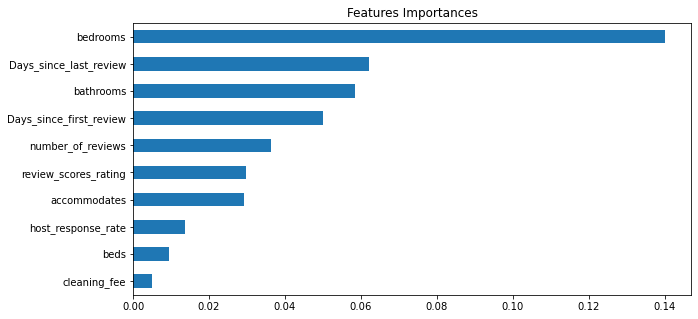

In [19]:
plt.figure(figsize=(10,5))
plt.title('Features Importances')
pd.Series(rf.feature_importances_, index=X_train.columns)[:10].sort_values().plot(kind='barh')


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(airbnb.drop('log_price', axis = 1), airbnb['log_price'])

GradientBoostingRegressor(random_state=101)

In [29]:
gbr_model.score(X_train, y_train)

y_pred1=gbr_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**.5
r2 = metrics.r2_score(y_test, y_pred)

print(rmse)
print(r2)

0.3877462236173745
0.6693503871055297
